In [2]:
pip install gradio torchvision scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from helpers import plot_loss
import gradio as gr
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler

## Visualize the dataset

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [7]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [11]:
print(cancer["target"])
print(cancer["target"].shape)
print(cancer["target"].sum())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [12]:
print(cancer['target_names'])

['malignant' 'benign']


In [13]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Create Dataframes using Pandas

In [15]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [16]:
df_cancer

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

In [17]:
df_cancer.describe().T

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

In [18]:
df_cancer.corr()['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

### Visualization

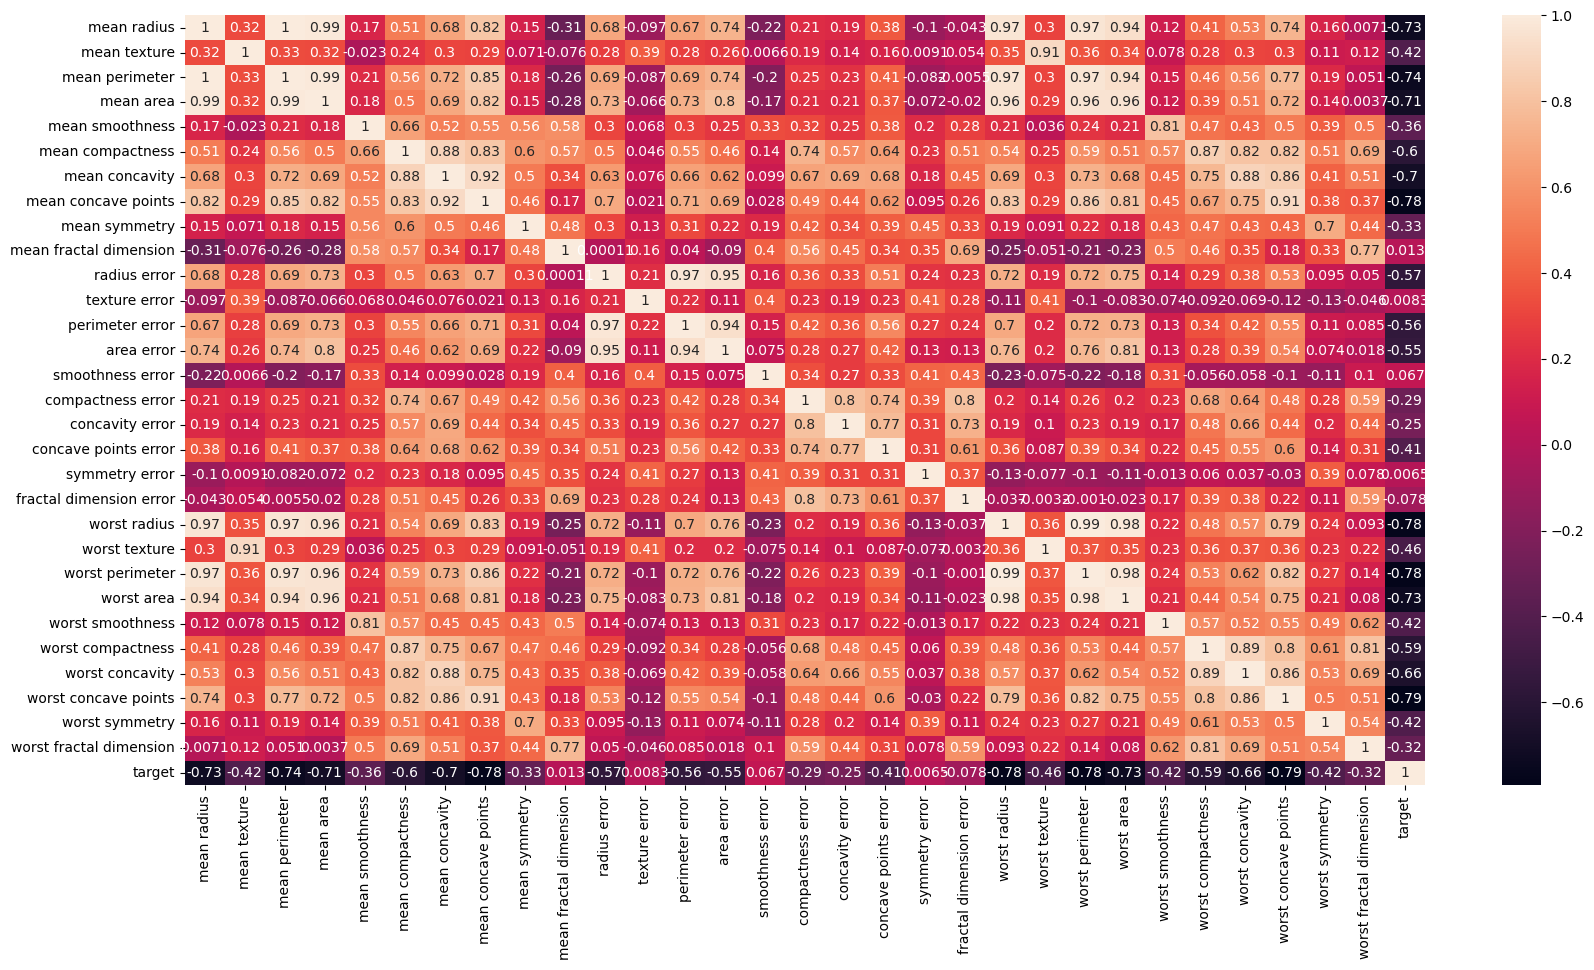

In [33]:
plt.figure(figsize=(20, 10))

ax = sns.heatmap(df_cancer.corr(), annot = True) # Show the correlation for each pair of features

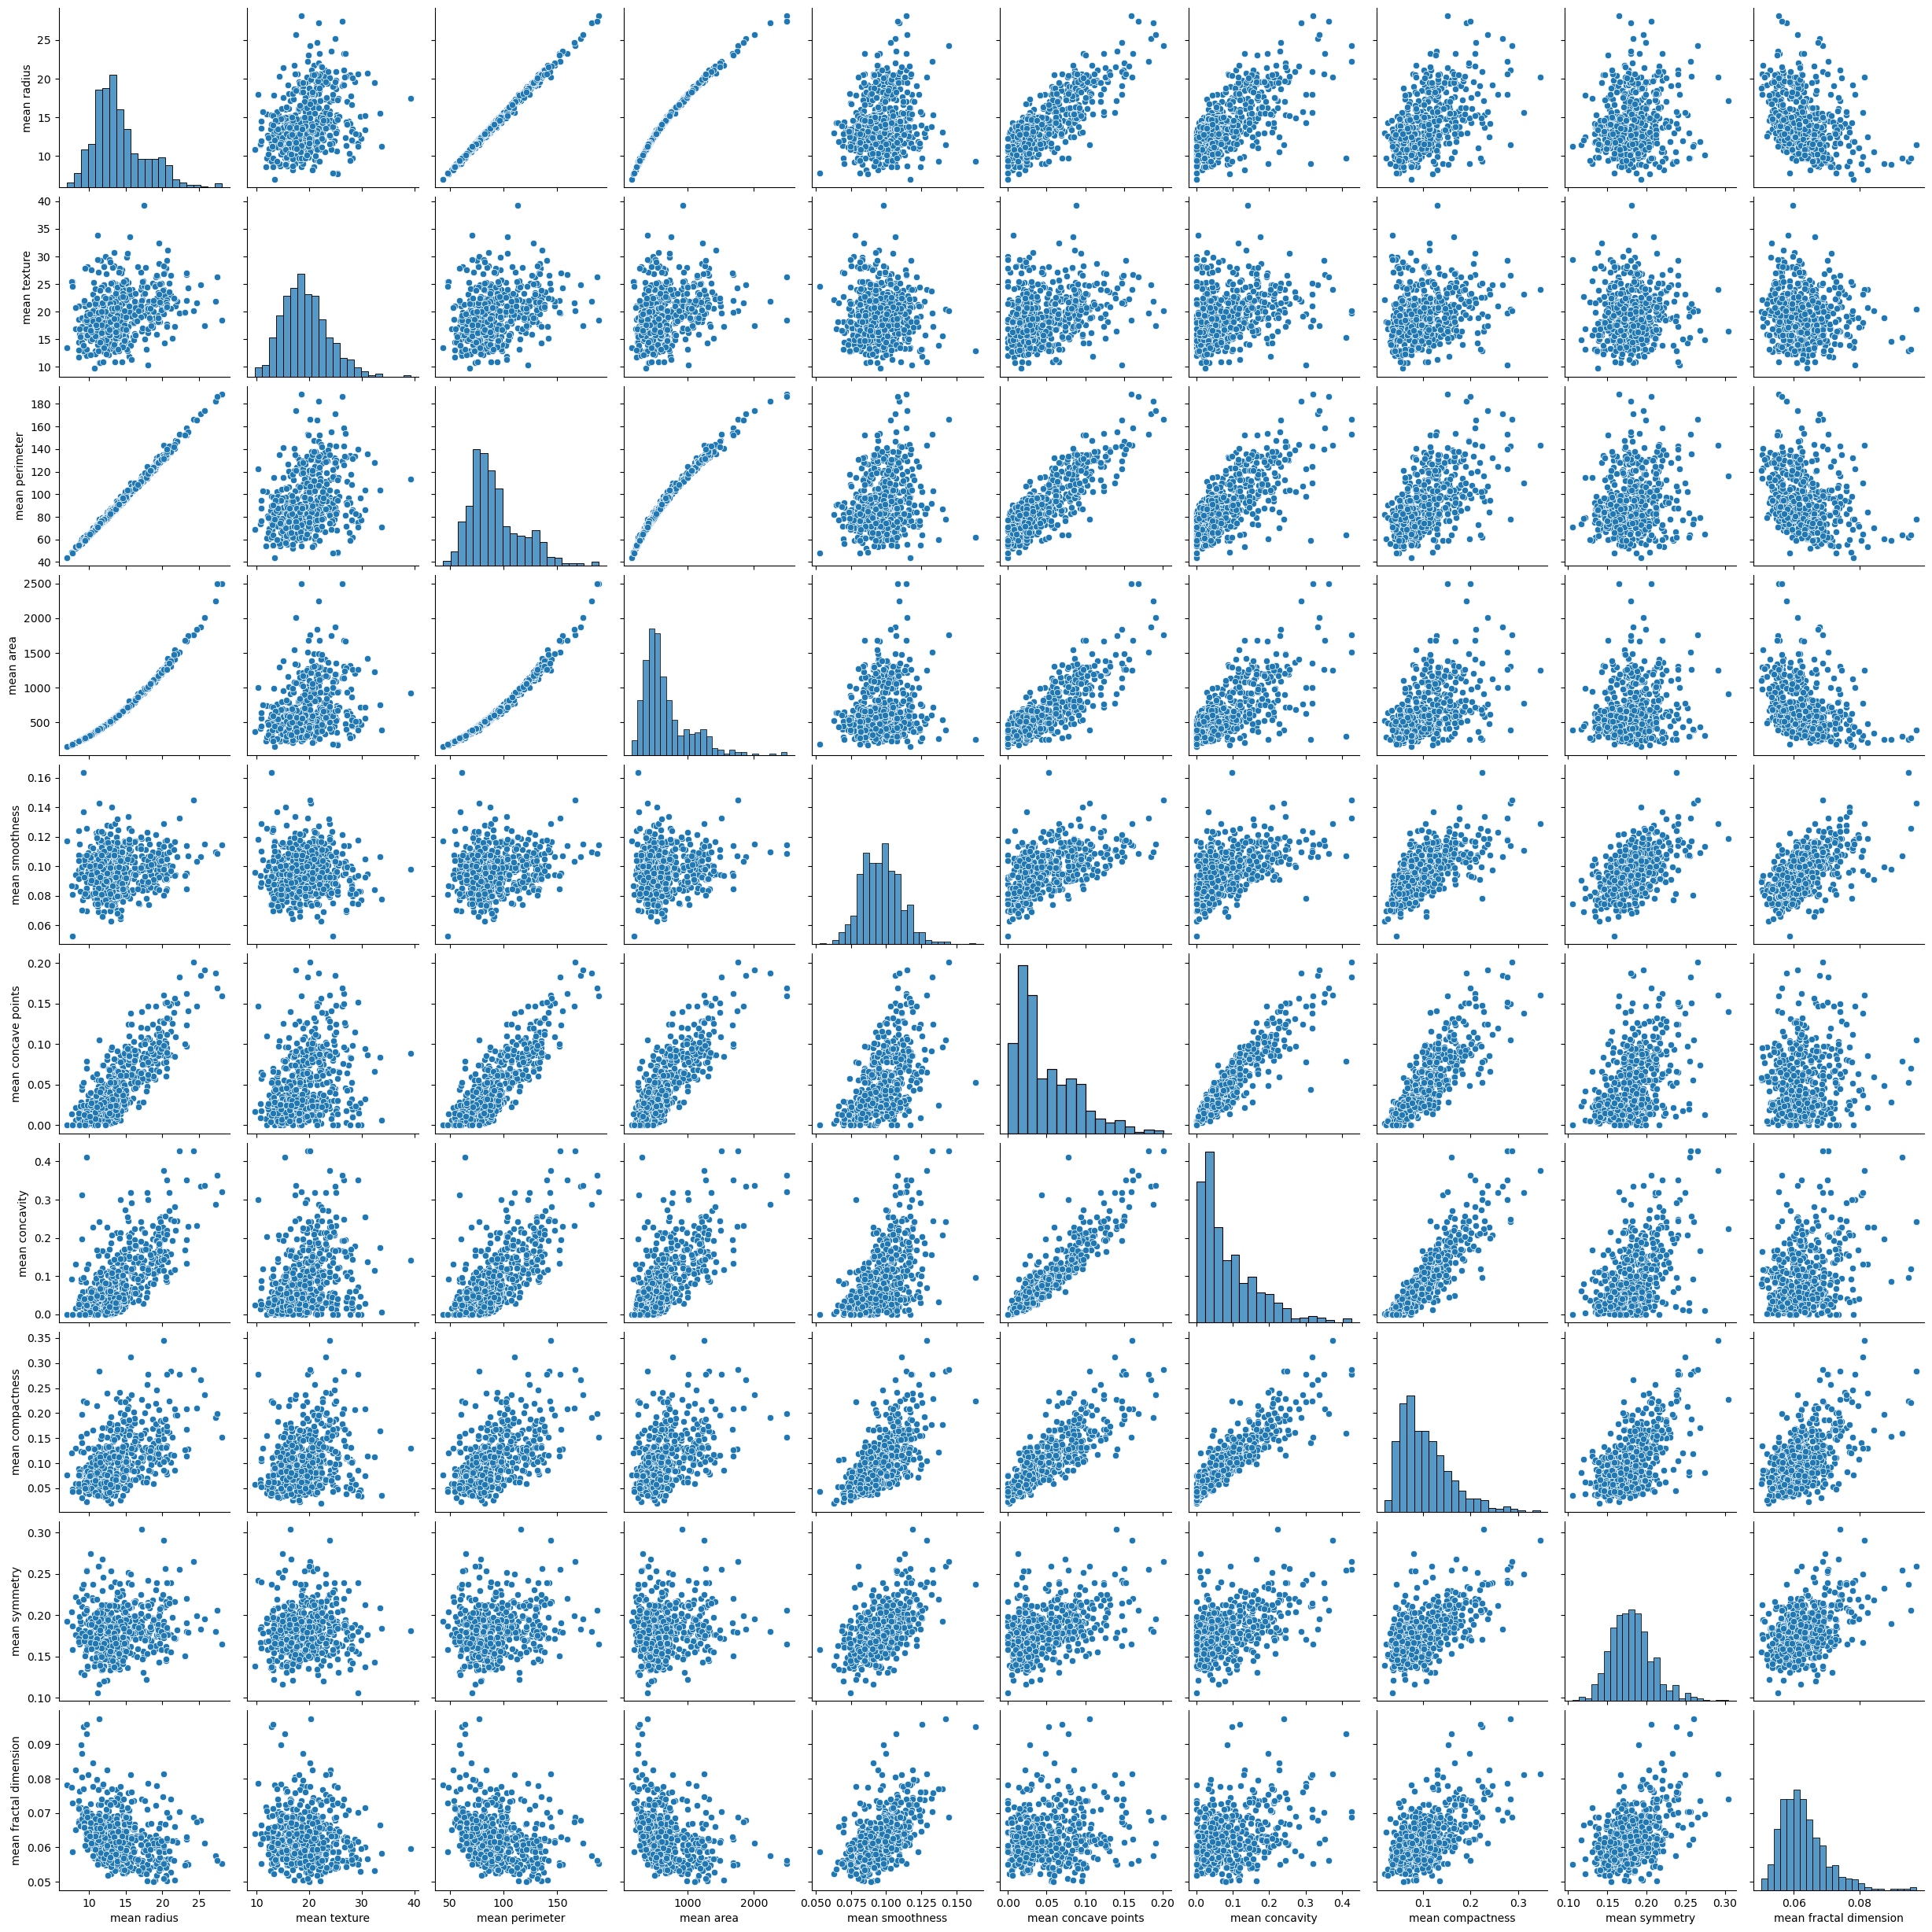

In [43]:
sns.pairplot(df_cancer, vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean concave points', 'mean concavity', 'mean compactness', 'mean symmetry', 'mean fractal dimension']) # Features that we care about

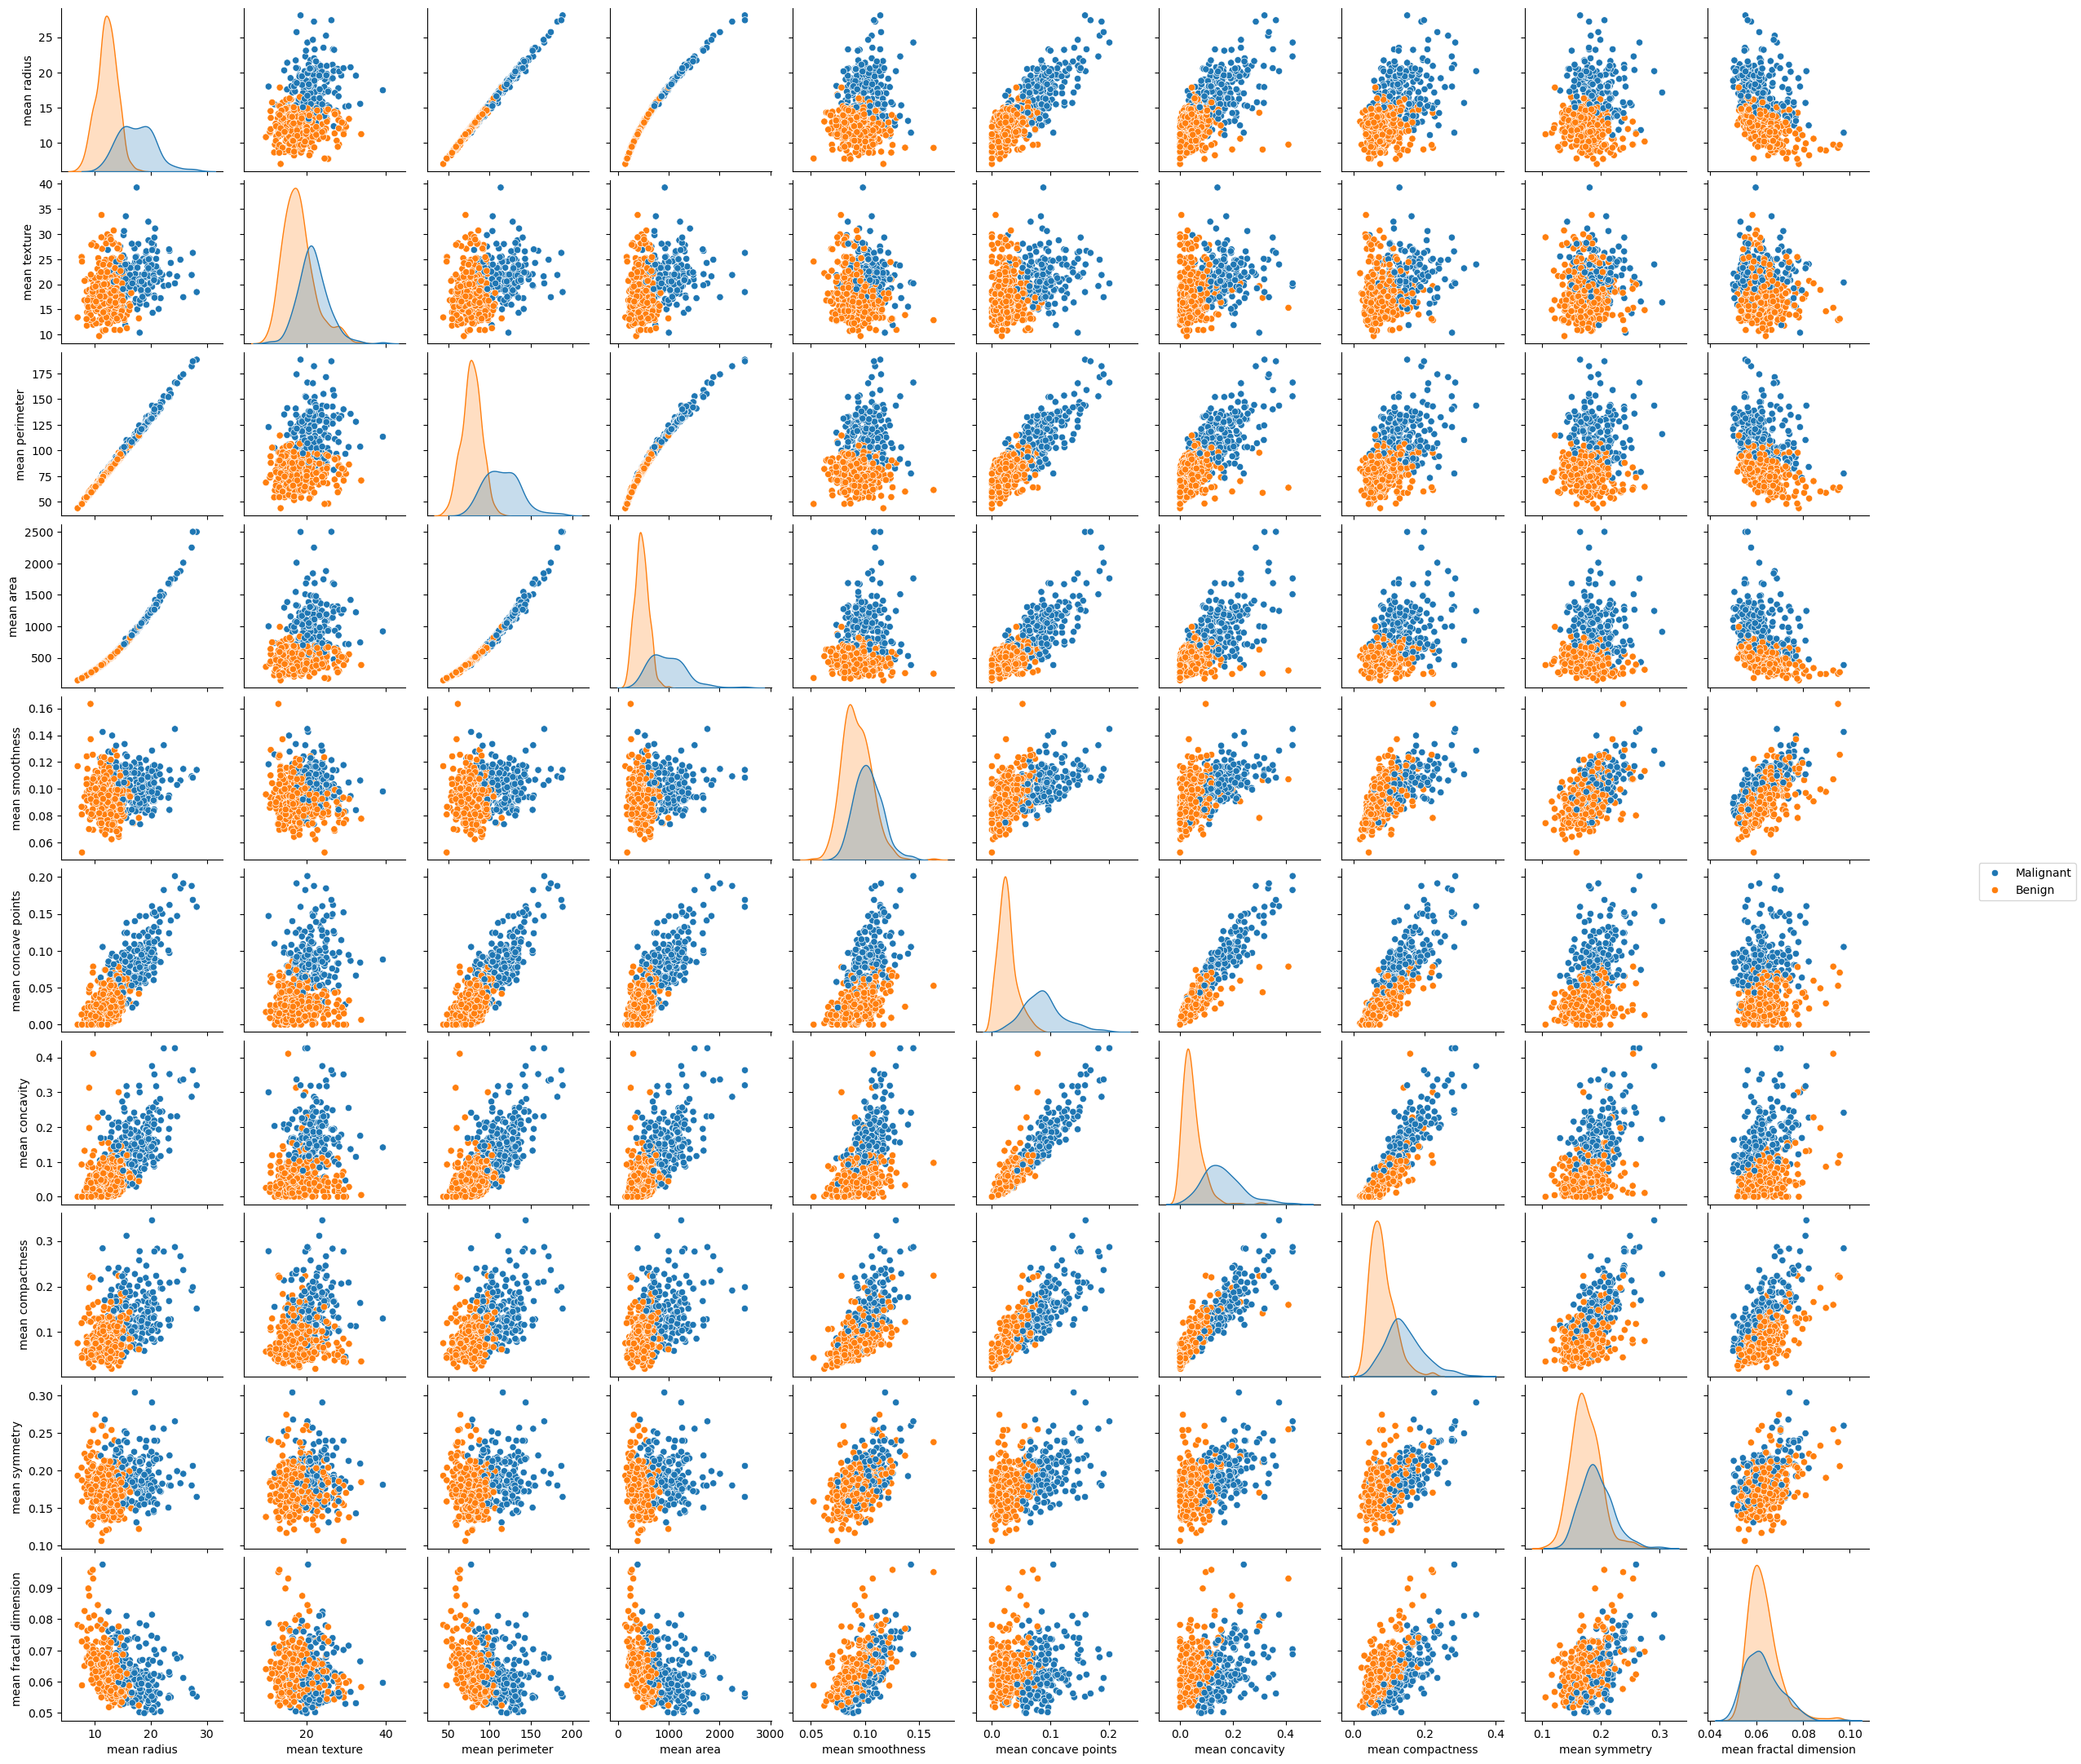

In [45]:
g = sns.pairplot(df_cancer, hue = "target", vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean concave points', 'mean concavity', 'mean compactness', 'mean symmetry', 'mean fractal dimension'])

# Allow legend to use words instead of numbers

handles = g._legend_data.values()
labels = ['Malignant', 'Benign']
g._legend.remove()
g.fig.legend(handles = handles, labels = labels, loc = 'center right', ncol = 1)
g.fig.subplots_adjust(top = 0.92, bottom = 0.08, right = 0.9)

## Model set up

### Chosen features

In [43]:
features = ['mean radius','mean concave points','mean smoothness','mean concavity','mean texture']
labels = ['target']

features_value = df_cancer[features].values
labels_value = df_cancer[labels].values.ravel()

feature_tensor = torch.FloatTensor(features_value)
label_tensor = torch.LongTensor(labels_value)

In [44]:
feature_tensor # input data

tensor([[17.9900,  0.1471,  0.1184,  0.3001, 10.3800],
        [20.5700,  0.0702,  0.0847,  0.0869, 17.7700],
        [19.6900,  0.1279,  0.1096,  0.1974, 21.2500],
        ...,
        [16.6000,  0.0530,  0.0846,  0.0925, 28.0800],
        [20.6000,  0.1520,  0.1178,  0.3514, 29.3300],
        [ 7.7600,  0.0000,  0.0526,  0.0000, 24.5400]])

In [45]:
label_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

### Utils

In [46]:
def shuffle_data(features: torch.Tensor, labels: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
    '''
    Shuffle the features and labels of a dataset.
    Returns a tuple of shuffled features and shuffled labels.
    '''
    shuffled_features, shuffled_labels = None, None

    shuffled_id = torch.randperm(features.size(0)) # return a tensor containing shuffled indices of features
    shuffled_features = features[shuffled_id]
    shuffled_labels = labels[shuffled_id] # even being shuffled, the label still have to go with its corresponding feature 

    return shuffled_features, shuffled_labels

In [47]:
def split_data(features: torch.Tensor, labels: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    '''
    Splits the data into a train and test set using
    the defined constant, TRAIN_TEST_SPLIT_RATIO. Please
    note that you *cannot* modify this constant.
    '''
    TRAIN_TEST_SPLIT_RATIO = 0.8
    train_features, train_labels = None, None
    test_features, test_labels = None, None

    # splitting for features:
    total_features = features.shape[0]
    train_feature_size = int(TRAIN_TEST_SPLIT_RATIO * total_features)
    test_feature_size = total_features - train_feature_size
    
    train_features, test_features = torch.split(features, [train_feature_size, test_feature_size], dim = 0)
    
    # splitting for labels:
    total_labels = labels.shape[0]
    train_label_size = int(TRAIN_TEST_SPLIT_RATIO * total_labels)
    test_label_size = total_labels - train_label_size
    
    train_labels, test_labels = torch.split(labels, [train_label_size, test_label_size], dim = 0)

    return train_features, train_labels, test_features, test_labels

In [48]:
def create_dataloader(train_features: torch.Tensor, train_labels: torch.Tensor, batch_size: int = 64) -> DataLoader:
    """Creates a DataLoader for the training features and labels."""
    train_dataset, train_loader = None, None

    train_dataset = TensorDataset(train_features, train_labels)
    train_loader = DataLoader(train_dataset, batch_size = batch_size)

    return train_loader

## Build Deep Neural Network

In [87]:
class NeuralNetwork(nn.Module):
    # Define the layers of the model that will be used in the forward pas͏󠄀͏󠄍͏︃͏︆͏︀͏︀͏︋͏󠄍͏󠄇͏󠄀͏󠄎͏󠄒͏︎͏󠄇͏︈͏︃͏︁s
    def __init__(self, input_size: int, hidden_size: int, output_size: int) -> None:
        super(NeuralNetwork, self).__init__()
        self.net = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Dropout(p=0.2), nn.Linear(hidden_size, hidden_size), nn.ReLU(), nn.Dropout(p=0.1), nn.Linear(hidden_size, output_size))
        print(input_size)

    # Construct the forward pass using the defined layers and pass the input x through each laye͏󠄀͏󠄍͏︃͏︆͏︀͏︀͏︋͏󠄍͏󠄇͏󠄀͏󠄎͏󠄒͏︎͏󠄇͏︈͏︃͏︁r
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.net(x)


In [75]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace = True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size = 1, stride = stride, bias = False))
            nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out



In [76]:
class ResNet18(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self._make_layer(BasicBlock, 64, 2, stride = 1)
        self.layer2 = self._make_layer(BasicBlock, 128, 2, stride = 2)
        self.layer3 = self._make_layer(BasicBlock, 256, 2, stride = 2)
        self.layer4 = self._make_layer(BasicBlock, 512, 2, stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, -1))
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
    
        return out
        
        
        
        
        
        

In [93]:
def set_hyperparameters() -> None:
    '''
    Sets the hyperparameters for the MNIST model.
    '''
    global EPOCHS, LR, BATCH_SIZE, EVAL_EVERY
    
    EPOCHS = 200
    LR = 0.01
    BATCH_SIZE = 3
    EVAL_EVERY = 2

In [94]:
set_hyperparameters()

In [95]:
def compute_loss(y_hat, y, averaged = True):
    y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
    y = y.reshape((-1))
    return F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none')

def training_step(y_hat, y):
    l = compute_loss(y_hat, y)
    return l

In [96]:
def train_model(features, labels, plot_losses = True):
    train_losses = []
    val_losses = []
    best_accuracy = 0

    model = NeuralNetwork(5, 128, 2)
    optim = torch.optim.SGD(model.parameters(), lr = LR)
    # Create Dataloaders

    features, labels = shuffle_data(features, labels)

    train_features, train_labels, test_features, test_labels = split_data(features, labels)

    train_loader = create_dataloader(train_features, train_labels, batch_size=BATCH_SIZE)
    test_loader = create_dataloader(test_features, test_labels, batch_size=BATCH_SIZE)

    for epoch in range(EPOCHS + 1):
        model.train()
        total_train_loss = 0

        for batch_features, batch_labels in train_loader:
            y_hat = model(batch_features)
            loss = training_step(y_hat, batch_labels)
            optim.zero_grad()
            loss.backward()
            optim.step()
                
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        if epoch % EVAL_EVERY == 0:
            model.eval()
            total_val_loss = 0
            total_correct = 0
            
            with torch.no_grad():
                for batch_features, batch_labels in test_loader:
                    y_hat = model(batch_features)
                    loss = compute_loss(y_hat, batch_labels)
                    preds = y_hat.argmax(axis = 1).type(batch_labels.dtype)
                    compare = (preds == batch_labels.reshape(-1)).type(torch.float32)
                    total_correct += compare.sum()
                    total_val_loss += loss.item()

            avg_val_loss = total_val_loss / len(test_loader)
            accuracy = (total_correct / len(test_loader.dataset)) * 100
            best_accuracy = accuracy if accuracy > best_accuracy else best_accuracy
            val_losses.append(avg_val_loss)

            print(
                f"Epoch {epoch}/{EPOCHS} | "
                f"Train Loss: {avg_train_loss:.4f} | "
                f"Validation Loss: {avg_val_loss:.4f} | "
                f"Accuracy: {accuracy:.2f}%"
            )

            if plot_losses:
                plot_loss(
                    train_losses, val_losses, eval_interval=EVAL_EVERY, dynamic=True
                )

    print(
        f"Final Train Loss: {avg_train_loss:.4f} | "
        f"Final Validation Loss: {avg_val_loss:.4f} | "
        f"Final Accuracy: {accuracy:.2f}%"
    )
    if plot_losses:
        plot_loss(train_losses, val_losses, eval_interval=EVAL_EVERY, dynamic=False)
    return model, train_losses, val_losses, best_accuracy

Final Train Loss: 0.3577 | Final Validation Loss: 0.2288 | Final Accuracy: 91.23%


<Figure size 640x480 with 0 Axes>

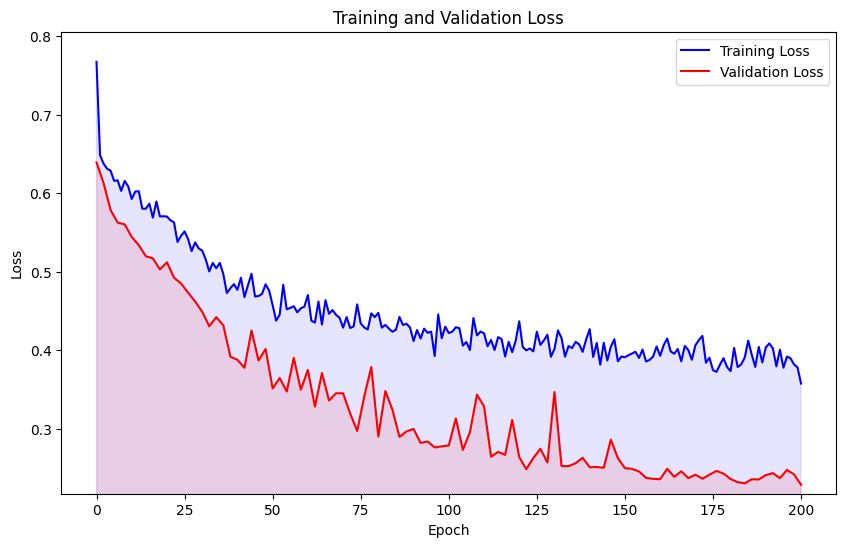

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [97]:
cancer_model, train_losses, val_lossesn, best_accuracy = train_model(feature_tensor, label_tensor, plot_losses=True)

In [98]:
best_accuracy

tensor(92.1053)